### Chapter 5: Probability Distributions

__Probability__ takes on a value from 0 to 1, with a probability $P(X) = 0$ for an event meaning that the stated condition - e.g., a standard 6 sided die will yield a 7 when rolled -  would never occur in an infinite number of flips. A probability of 0.5 means that in a sufficiently large number of trials, approximately half of the trials would result in the stated condition. A probability of 1 means all trials would result in the stated condition so that the number of successes in a trial would be equal to the number of attempts. 

__Probability Distributions__ display all of the possible values that a _random variable_ $X$ could take on on the x-axis, and the corresponding probability of that value on the y-axis. Hence, the area under the probability distribution will always be equal to one. 
   - The random variable $\bar{X}$, which represents the the mean of a sample drawn from a larger population, defines a _**sampling distribution**_, which gives all values possible for $\bar{X}$, $\bar{X_i}$, and the probability of that value occuring. $\bar{X}$ can take on values falling on its sampling distribution, which describe the likelihood of getting a given mean for a given sample size.  This sampling distribution takes on a standard deviation of $\frac{S}{\sqrt(n)}$, otherwise known as the **standard error.** 

Distributions can be described by: 
- Their mean, $\mu$(or $\bar{X}$ for sampling distributions), which is the average value of the dataset.  
- Their standard deviation, $\sigma$, which determines how flat the curve is, and how densely the data clusters around the mean(SE for sampling distributions).
- Skewness, $S_{KP}$, which refers to a distortion or asymmetry of a distribution. 
- Kurtosis, $k$, which describes how much of the distribution lays in its tails. 

### Types of Probability Distributions
#### Normal Distributions
Normal Distribution, also known as Gaussian distribution, is ubiquitous in Data Science and often used when modeling economic phenomena. You will encounter it in predictive models you create. It is one of the assumptions of many statistical techniques.

A normal distribution has a bell-shaped density curve described by its mean $\mu$ and standard deviation $\sigma$. The density curve is symmetrical(skewness of 0), centered about its mean, with its spread determined by its standard deviation. Data near the mean - e.g., $\sigma < 1$ - are more frequent in occurrence than data far from the mean - e.g., $\sigma > 2$. 


A random variable $X$ which follows a normal distribution with mean $\mu$ and standard deviation $\sigma$ and has this density function: 
<h3 align="center">
    <font size="4">
        $ X = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2} $
    </font>
    </h3> 
    
If one knew the mean and standard deviation of a particular distribution, it would be possible to estimate the probability of drawing a value from a particular range - e.g., $a \leq X \leq b$ - by taking the definite integral of this function: 
<h3 align="center">
    <font size="4">
        $\int_{a}^{b}\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}dx$.
    </font>
</h3>

#### Standard Normal Distribution

The standardized normal distribution is the most important member of the family of normal probability distributions—the one with $\mu = 0$  and $\sigma = 1$. The normal random variable distributed according to the standard normal distribution is called the standard normal variable and is denoted by $Z$. It represents the number of standard deviations a given point X lies from the mean of the standard normal distribution.  It is expressed as
<h3 align="center">
    <font size="4">
        $ Z =  \frac{X-\mu}{\sigma}$
    </h3> 

A key feature of all normal distributions is that, using the equation above, they can be transformed to be analyzed using the standard normal distribution.
    
_If you divide any normal distribution by its standard deviation(normalizing the SD to be 1), that normal distribution becomes the standard normal distribution._

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from stats import *

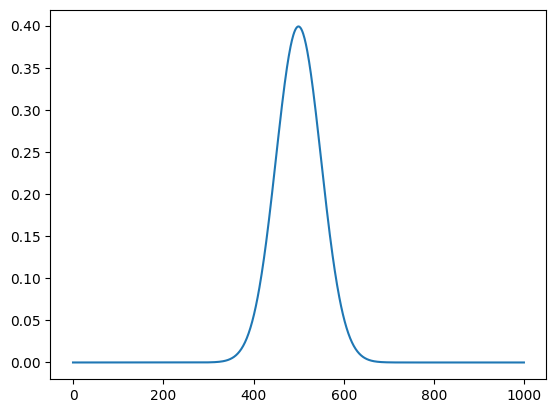

In [2]:
# takes a list fo x values in a given range with some number of finite
# divisions, will create a y value that correlates with each x value that was passed
def normal_dist(mean, sd, x = np.linspace(-10, 10, 1000)):
    prob_density = 1 / (sd * (2 * np.pi) ** .5) * np.exp(-0.5 * ((x - mean) / sd) ** 2)
    return prob_density

normal_dist_list = normal_dist(mean = 0, sd = 1)
plt.plot(normal_dist_list)

Text(0.5, 1.0, '$\\mu$ = 0\t $\\sigma_0$ = 1 \t $\\sigma_1$ = 2 \t $\\sigma_1$ = 3 ')

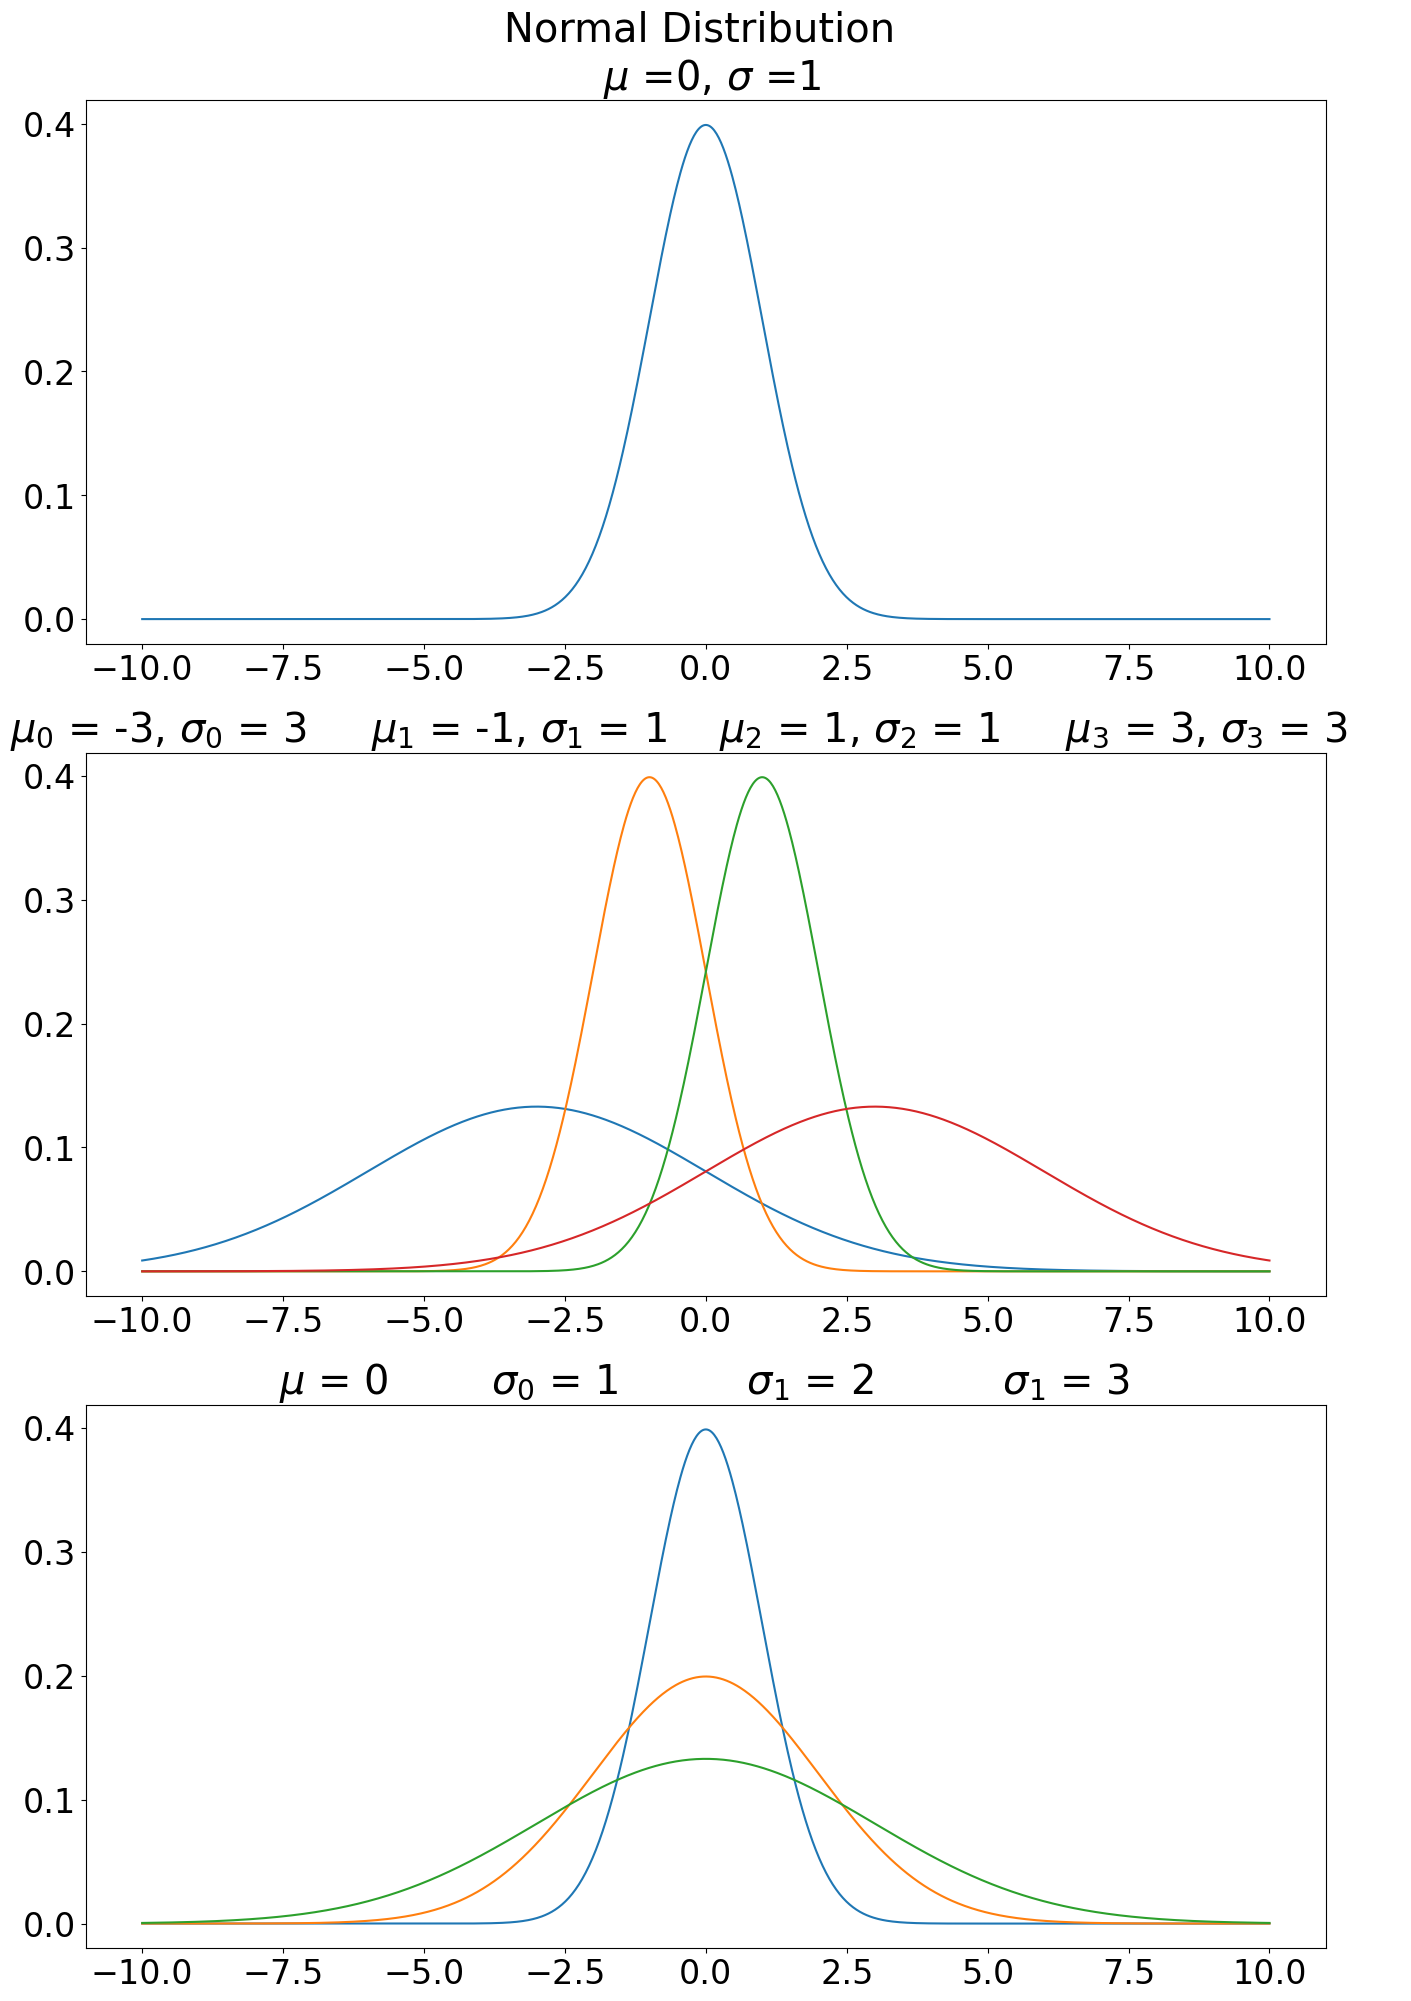

In [3]:
plt.rcParams.update({'font.size' : 24})
fig, axs = plt.subplots(3, 1, figsize = (16, 24))
x = np.linspace(-10, 10, 1000)

# perform transformation
mean_, sd = 0, 1
normal_dist_list = normal_dist(mean= 0, sd= 1, x = x)
axs[0].plot(x, normal_dist_list)
axs[0].set_title('Normal Distribution \n $\mu$ =' + str(mean_) +  ', $\sigma$ =' + str(sd))

ax1_title = ''
ax1_sub = 0
for mean_ in range(-3, 4, 2):
    sd = abs(mean_)
    normal_dist_list = normal_dist(mean = mean_, sd = sd, x = x)
    axs[1].plot(x, normal_dist_list)
    ax1_title = ax1_title + '$\mu_' + str(ax1_sub) + '$ = ' + str(mean_) + ', '
    ax1_title = ax1_title + '$\sigma_' + str(ax1_sub) + '$ = ' + str(sd) + '\t '
    ax1_sub += 1
axs[1].set_title(ax1_title)

ax2_title = '$\mu$ = 0'
ax2_sub = 0
for sd in range(1, 4):
    mean_ = 0
    normal_dist_list = normal_dist(mean = mean_, sd = sd)
    axs[2].plot(x, normal_dist_list)
    ax2_title = ax2_title + '\t $\sigma_' + str(ax2_sub) + '$ = ' + str(sd) + ' '
    ax2_sub =+ 1
axs[2].set_title(ax2_title)

## Lognormal Distribution

A random variable $X$ is said to have a lognormal distribution if $Y = ln(X)$ is normally distributed, where $ln$ denotes the natural logarithm.

In other words, $X$ is log-normally distributed if the natural logarithm of $X$ is normally distributed with mean $\mu$  and variance $\sigma ^2$:

$ln(X) = N(\mu, \sigma^2)$

The lognormal distribution is positively skewed with many small values and just a few large values. Consequently, the mean is greater than the mode in most cases.
Since the lognormal distribution is bound by zero on the lower side, it is perfect for modeling asset prices that cannot take negative values. On the other hand, the normal distribution cannot be used for the same purpose because it has a negative side.

When the returns on a stock (continuously compounded) follow a normal distribution(as shown above), the stock prices follow a lognormal distribution. Note that even if returns do not follow a normal distribution, the lognormal distribution is still the most appropriate model for stock prices.

The probability density function of the distribution is:
<h3 align="center">
    <font size="4">
        $f(x) = \frac{1}{x\sigma\sqrt{2\pi}}e^{\frac{- (lnx-\mu)^2}{2\sigma^2}}$
    </font>
    </h3> 

In [4]:
import warnings
warnings.filterwarnings("ignore")
# Optionally, pass different array of x values tp be transformed; default is np.linspace(-5, 5, 1000)
def create_lognormal(mean, sd, x = np.linspace(0, 10, 1000)):
    density_points = (1 / x * sd * np.sqrt(2 * math.pi)) * math.e ** (
        -(np.log(x) - mean) ** 2 / (2 * sd ** 2))
    return density_points

x = np.linspace(0, 10, 1000)
mean, sd = 1,1
log_norm = create_lognormal(mean = mean, sd = sd, x = x)

Text(0.5, 1.0, 'Lognormal Distribution with μ = 1 and σ = 1')

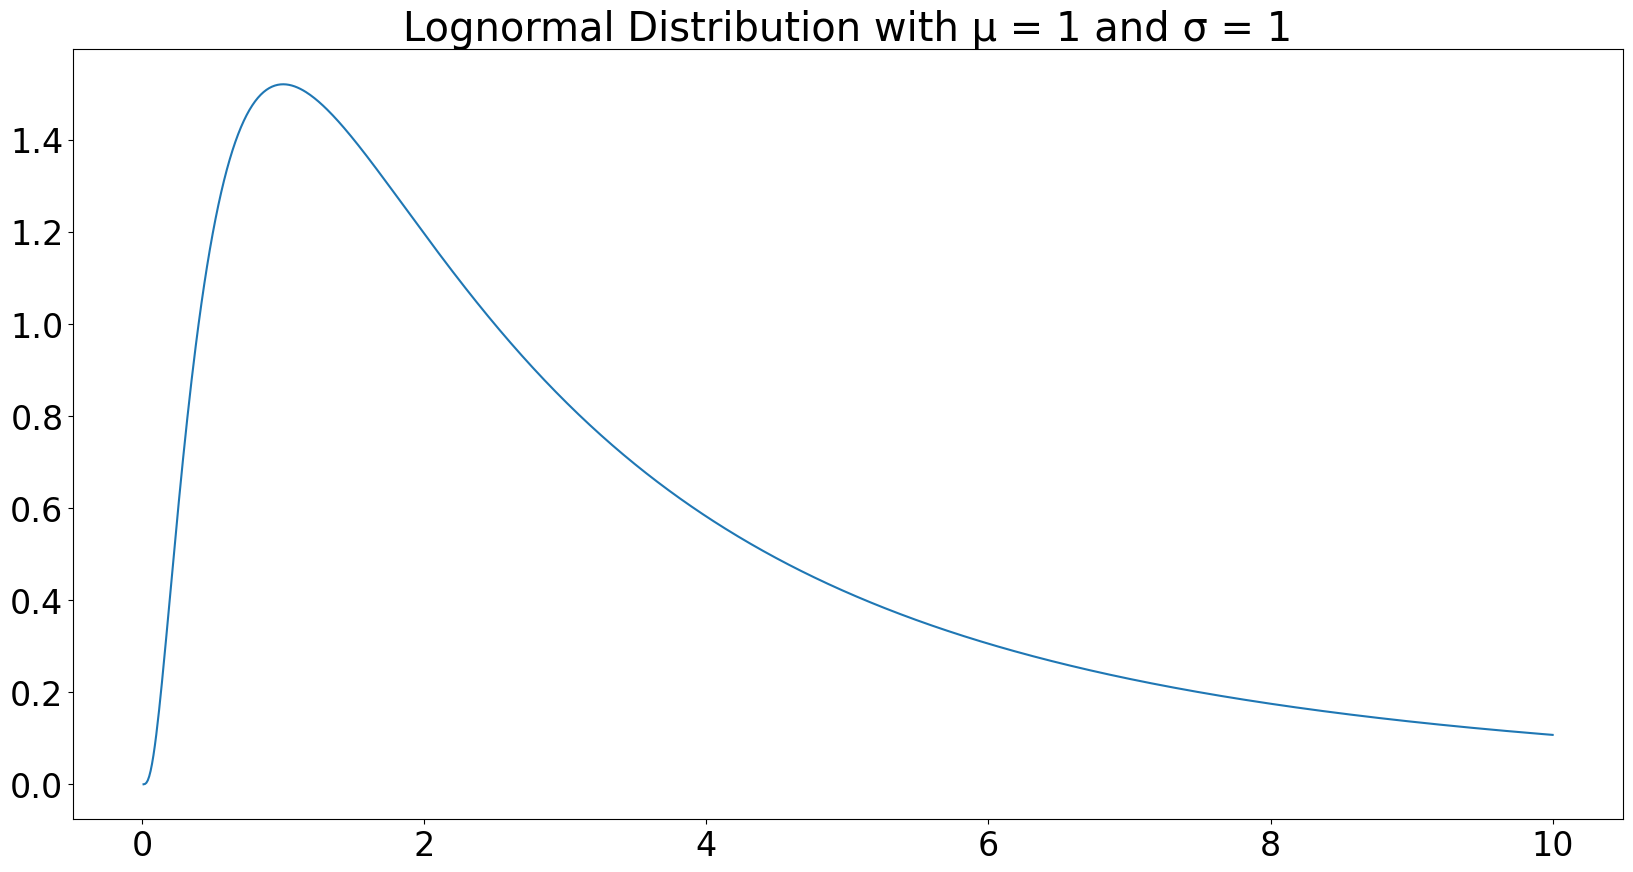

In [5]:
fig, ax = plt.subplots(figsize = (20, 10))
ax.plot(x, log_norm)
ax.set_title('Lognormal Distribution with μ = ' + str(mean) + ' and σ = ' + str(sd))

Text(0.5, 1.0, 'Lognormal Distribution with μ = 1 and σ = 1')

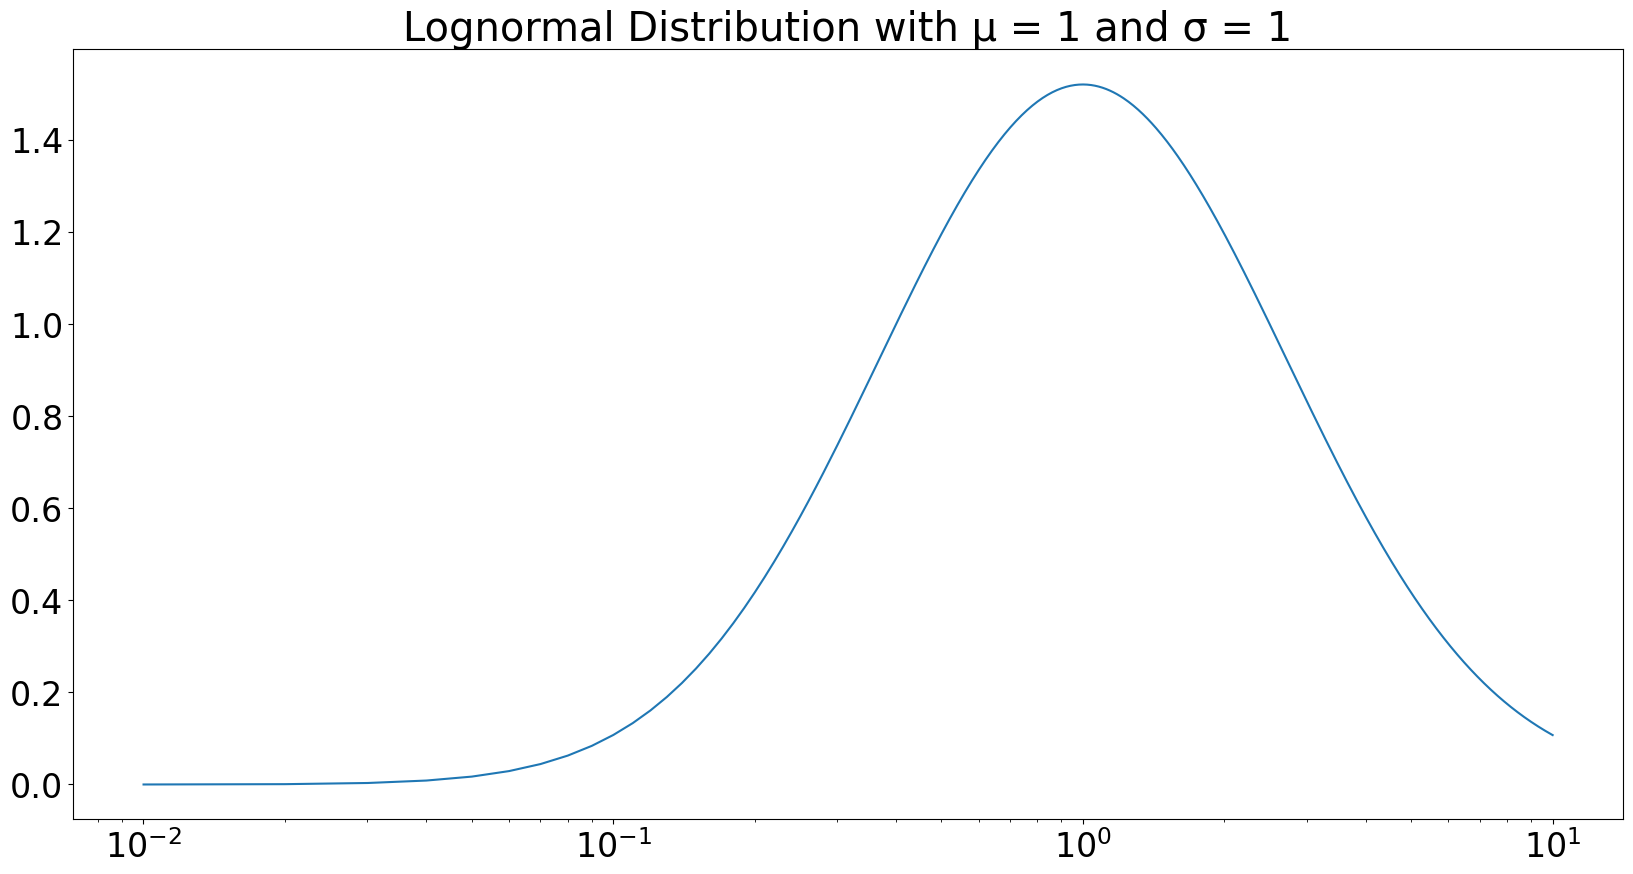

In [6]:
fig, ax = plt.subplots(figsize = (20, 10))
ax.plot(x, log_norm)
plt.xscale('log')
ax.set_title('Lognormal Distribution with μ = ' + str(mean) + ' and σ = ' + str(sd))

### Binomial Distribution
If $X$ is a random variable that yields the number of successess seen in the trials of a binomial(yes or no) experiment, then we say that $X$ follows a binomial distribution.

We are interested in finding the probability that some particular number of successes is seen in the course of that binomial experiment.

- $n$ = the number of trials
- $x$ = some number of successes, with $0≤x≤n$
- $p$ = the probability of success on any one trial
- $q$ = $1−p$ = the probability of failure on any one trial

A binomial trial can result in a success with probability $p$ and a failure with probability $q = 1−p$. Then the probability distribution of the binomial random variable $X$, the number of successes in $n$ independent trials, is
<h3 align="center">
    <font size="4">
        $b(x; n, p) = {n \choose x}p^xq^{n-x}$
    </font>
    </h3> 

Where  $x = 0, 1, 2,..., n$ and ${n \choose x}=\frac{n!}{x!(n-x)!}$

The most common example is flipping a coin, which can be modeled as $x=$ the number of "heads" or "tails" in $n$ trials. The probability of success and failure is 0.5. 

The mean $\mu$ and standard deviation $\sigma$ for a binomial distribution $b(x; n, p)$ are
- $\mu = np$
- $\sigma = \sqrt{np(1-p)}$

We define and graph the binomial distribution for various x, p, and n values. 

As an example of the binomial distribution, we can think of the top hedge funds in the stock market. If we assume that the markets are efficient and any given mutual fund only has a 50% probability of beating the market in every year, if there is a large $n$, or a large number of firms, many of them will survive for many years, just by chance. This example is demonstrated wonderfully in Burton Malkiel's *A Random Walk Down Wallstreet* in which he describes a coin flipping contest of 1000 people, which guarantees that multiple people will win more than 10 rounds simply by chance, and then become world-renouned as amazing coin-flippers. 

- How many funds will 'beat' an efficient market for more than 10 years if there are 1000 funds to start? We will find the probability of a single fund beating the market for that long and then multiply that by 1000 funds. 

- $ = P(1) = {10 \choose 1}0.5^{1}0.5^{10-1} = 0.0097$, so there is a 0.97% chance of a single fund beating an efficient market for 10 years, and we can reasonably expect that 97 funds will beat the market for 10 years if 100 start, just by chance. 

In [7]:
def binomial(x, n, p):
    q = 1 - p
    return float(math.factorial(n)) / (
                math.factorial(int(x)) * math.factorial(n - int(x))) * p ** x * q ** (n - int(x))

    #return float(math.factorial(n)) / (
        #math.factorial(x) * math.factorial(n-x)) * p ** x * q ** (n - x)
binomial(x = 50, n = 100, p =.5)

0.07958923738717875

In [8]:
# probability of generating a total betwenn X0 and X1 for a given p, n
def probability_of_outcome(X0, X1, p, n):
    P = 0
    for x in range(X0, X1 + 1):
        P += binomial(x = x, n = n, p = p) 
    return P

p, n = .5, 100
X0 = 40
X1 = 60

probability_of_outcome(X0, X1, p, n)

0.9647997997822952

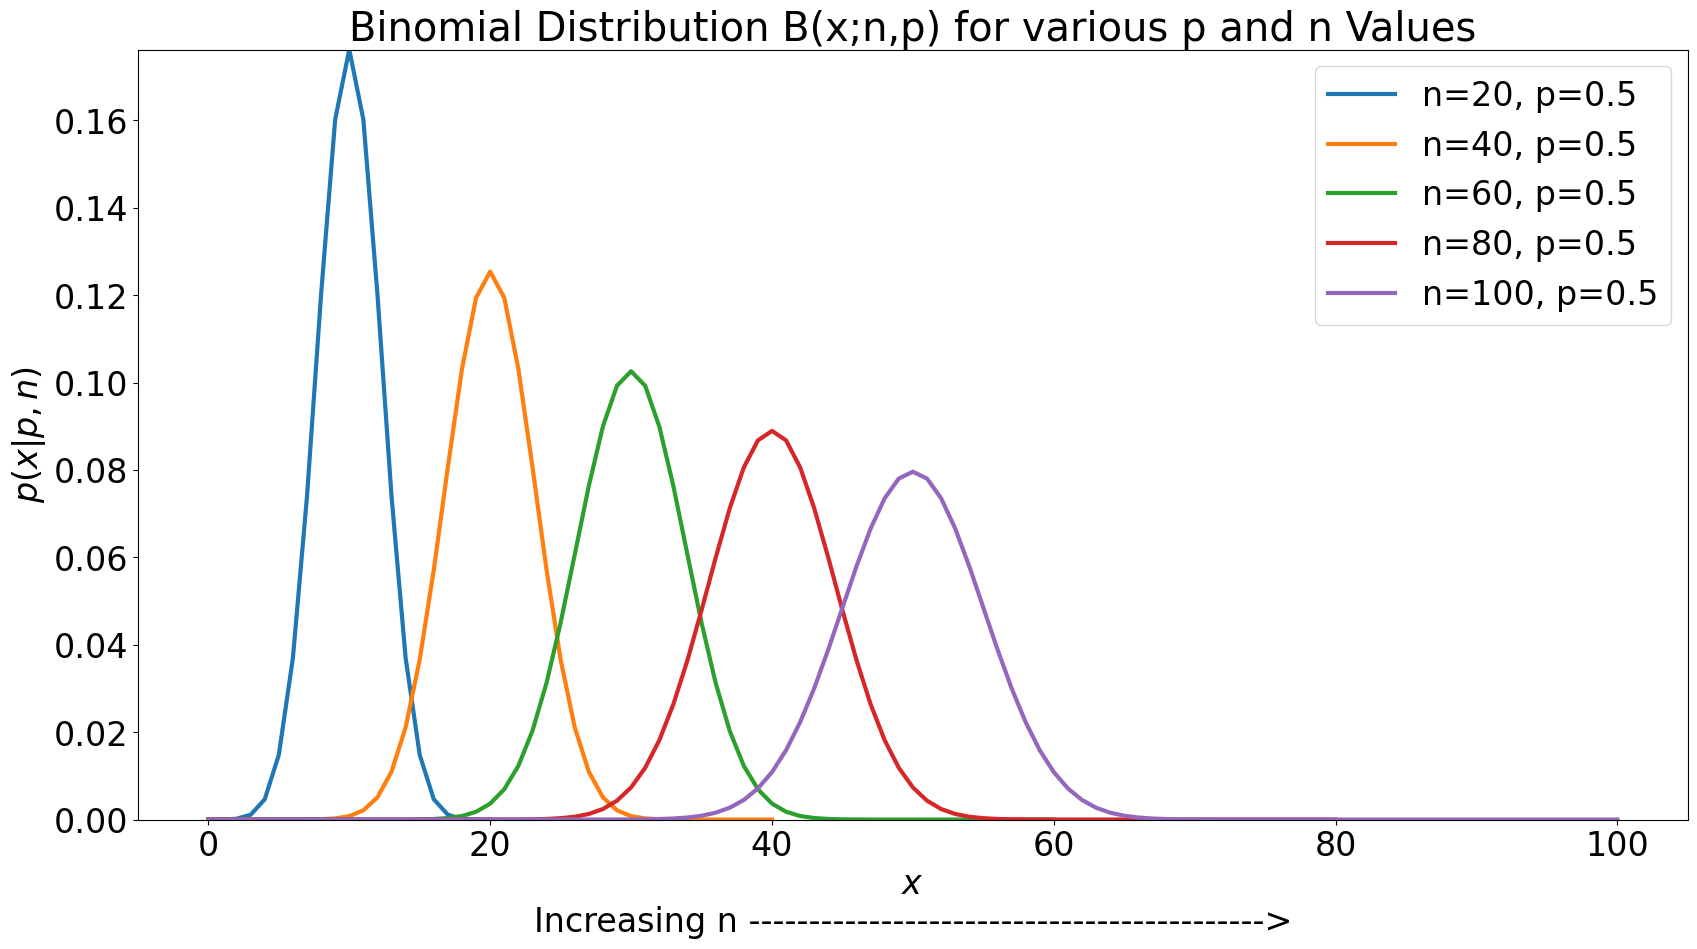

In [9]:
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import Normalize

fig, ax = plt.subplots(figsize = (20, 10))
cmap = cm.get_cmap('Blues')
ymax = binomial(20 * p, 20, p)
for n in range(20, 101, 20):
#     x = int(n * p)
    # make a list of probability of every possible outcome
    #  from 0 to n
    binom_vars = [binomial(x, n, p) for x in range(n + 1)]
    # plot_line that is composed of all probabilities
    plt.plot(binom_vars, 
             linewidth = 3,
            label=f'n={n}, p={p}')
# change max y axis value from 1 to the something closer to the maximum
#  probabity across all range from 0 to n for which we constructed 
#  distributions
ax.set_ylim(ymin = 0, ymax = ymax)

plt.xlabel('$x$\nIncreasing n ------------------------------------------->',
           fontsize=24)
plt.ylabel('$p(x | p, n)$', fontsize=24)
plt.title('Binomial Distribution B(x;n,p) for various p and n Values')
plt.legend()

### Working with Time Series Data

We will be working with stock price data. This data is an instance of time series data. The structure of untransformed time series data often violates the requirements of a random variable that observations be:

1. identitically distributed 
2. independent

To be identitically distributed means that observations are drawn from the same distribution. To be independent means that neighboring observations should not mutually influence one another. The independence criterion is typically violated for a single variable. Further, if two variables are subject to the I.I.D. assumptions, then not only must observations from a sample be subject to this criterion, but so too observations of the two variables must not be correlated. Here, we will show that individual samples are identically distributed. In a Chapter 6, we will be able to test whether or not the draws are observations of a given sample are independent of their neighbors. And in chpater 7, we will later consider the I.I.D. assumption when working with multiple variables using Ordinary Least Squares regression.

We will first show that unstransformed stock data is not identically distributed. But first, we need to download the data. We will use *pandas_datareader* to access yahoo finance. If you have not used this module before, install it using the command:

> *pip install pandas-datareader*

If you want to install this library from within Jupyter notebook, use:

> *!pip install pandas-datareader*

Note: A recent update to yahoo finance has broken the ability of pandas-datareader download yahoo finance data. A patch has been added to the github. If the above installation does not work, use:

>  *pip install git+https://github.com/raphi6/pandas-datareader.git@ea66d6b981554f9d0262038aef2106dda7138316*


In [10]:
import pandas_datareader.data as web
import yfinance as yf
import datetime
import pandas as pd

In [11]:
yf.pdr_override()
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime.today()

data_dict = {}
stocks = ['MSFT', 'AAPL', 'PG', 'TSLA']
for stock in stocks:
    data_dict[stock] = web.get_data_yahoo(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [12]:
data_dict['MSFT']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,26.549999,26.959999,26.389999,26.770000,21.413063,64731500
2012-01-04,26.820000,27.469999,26.780001,27.400000,21.916992,80516100
2012-01-05,27.379999,27.730000,27.290001,27.680000,22.140968,56081400
2012-01-06,27.530001,28.190001,27.530001,28.110001,22.484915,99455500
2012-01-09,28.049999,28.100000,27.719999,27.740000,22.188957,59706800
...,...,...,...,...,...,...
2023-03-15,259.980011,266.480011,259.209991,265.440002,265.440002,46028000
2023-03-16,265.209991,276.559998,263.279999,276.200012,276.200012,54768800
2023-03-17,278.260010,283.329987,276.320007,279.429993,279.429993,69492200


In [13]:
[df['Close'] for df in data_dict.values()]

[Date
 2012-01-03     26.770000
 2012-01-04     27.400000
 2012-01-05     27.680000
 2012-01-06     28.110001
 2012-01-09     27.740000
                  ...    
 2023-03-15    265.440002
 2023-03-16    276.200012
 2023-03-17    279.429993
 2023-03-20    272.230011
 2023-03-21    273.779999
 Name: Close, Length: 2822, dtype: float64,
 Date
 2012-01-03     14.686786
 2012-01-04     14.765714
 2012-01-05     14.929643
 2012-01-06     15.085714
 2012-01-09     15.061786
                  ...    
 2023-03-15    152.990005
 2023-03-16    155.850006
 2023-03-17    155.000000
 2023-03-20    157.399994
 2023-03-21    159.279999
 Name: Close, Length: 2822, dtype: float64,
 Date
 2012-01-03     66.830002
 2012-01-04     66.800003
 2012-01-05     66.519997
 2012-01-06     66.360001
 2012-01-09     66.639999
                  ...    
 2023-03-15    141.830002
 2023-03-16    142.889999
 2023-03-17    142.929993
 2023-03-20    145.130005
 2023-03-21    144.080002
 Name: Close, Length: 2822, dtype: f

In [14]:
close_data = pd.concat([df['Close'] for df in data_dict.values()],
                        keys = data_dict.keys(),
                        axis = 1)

close_data

,MSFT,AAPL,PG,TSLA
Date,,,,
2012-01-03,26.770000,14.686786,66.830002,1.872000
2012-01-04,27.400000,14.765714,66.800003,1.847333
2012-01-05,27.680000,14.929643,66.519997,1.808000
2012-01-06,28.110001,15.085714,66.360001,1.794000
2012-01-09,27.740000,15.061786,66.639999,1.816667
...,...,...,...,...
2023-03-15,265.440002,152.990005,141.830002,180.449997
2023-03-16,276.200012,155.850006,142.889999,184.130005
2023-03-17,279.429993,155.000000,142.929993,180.130005


Text(0.5, 1.0, 'Daily Stock Prices')

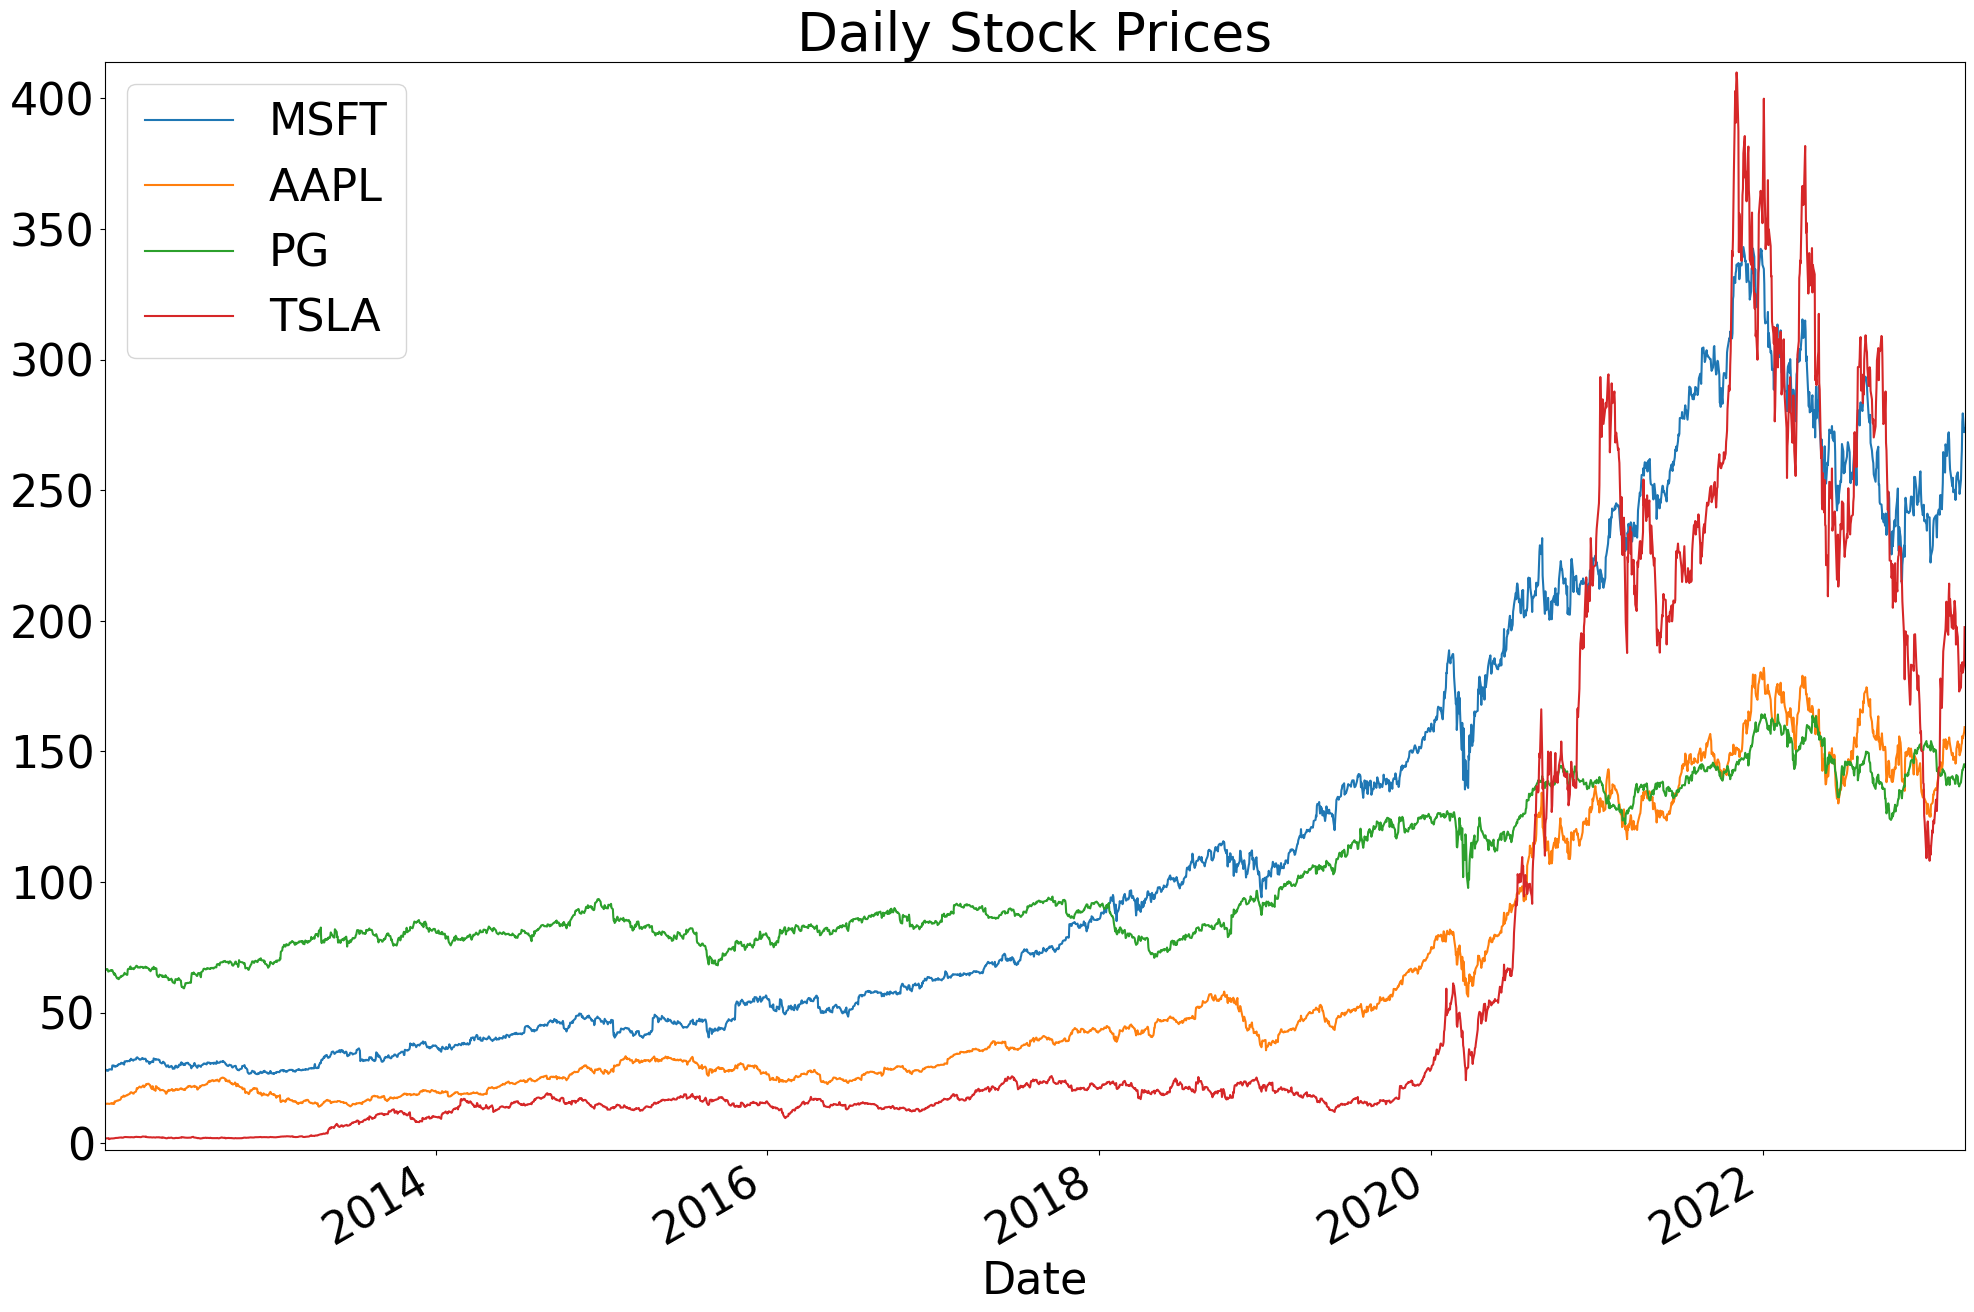

In [15]:
import matplotlib.pyplot as plt

plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = .01
plt.rcParams.update({'font.size' : 32})
fig, ax = plt.subplots(figsize = (24, 16))
close_data.plot.line(ax = ax, legend = True)
ax.set_title('Daily Stock Prices')

The data appears to be quite volatile. This is because we are viewing data in observed units rather than comparing changes in proportional terms. If we log the axis, we will see that the data actually is much more stable than would be suggested by the above graph. 

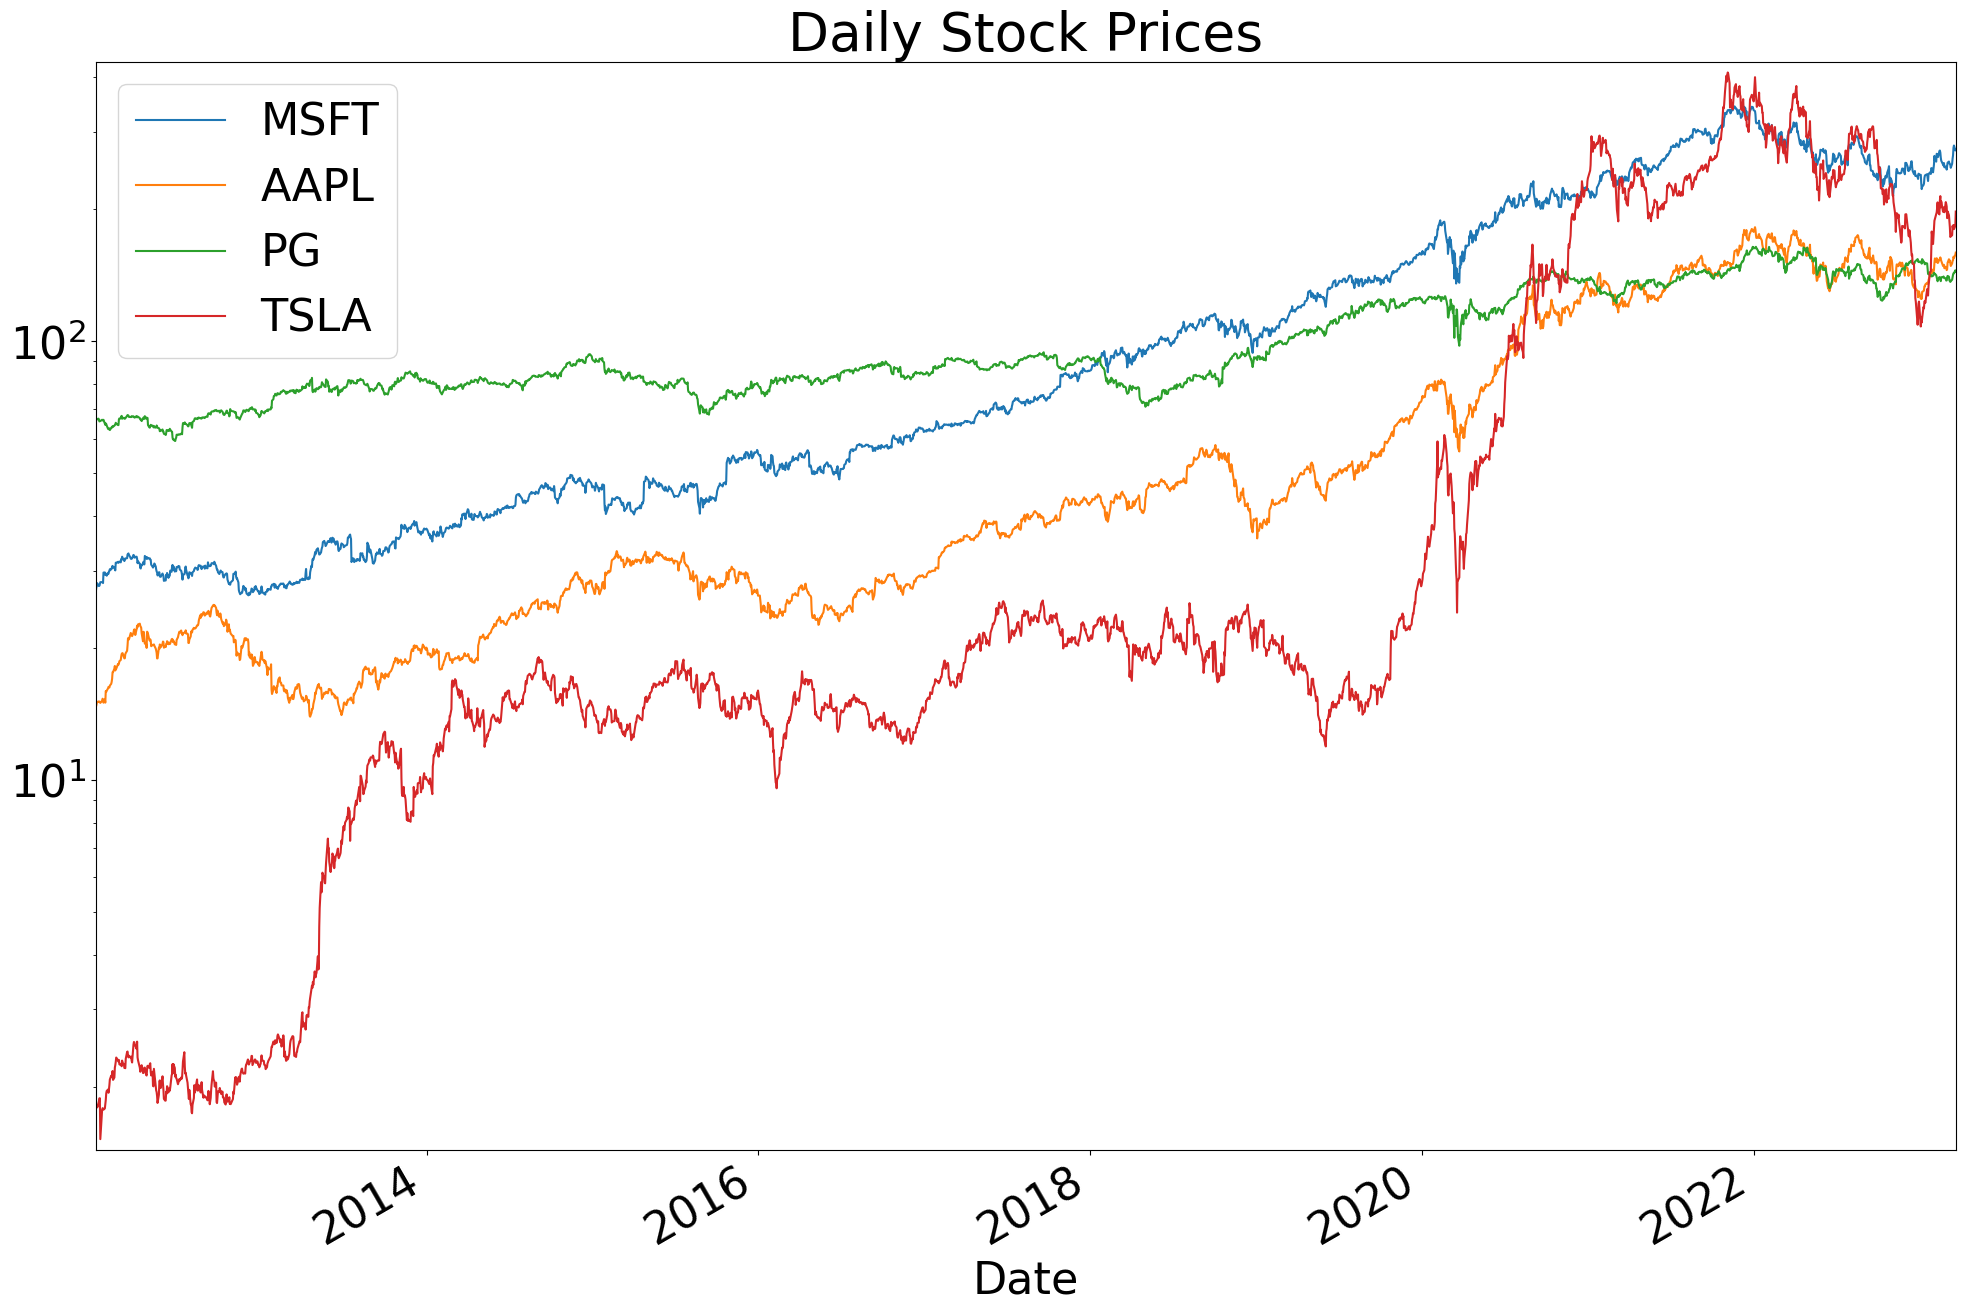

In [16]:
fig, ax = plt.subplots(figsize = (24, 16))
close_data.plot.line(ax = ax, legend = True)
ax.set_title('Daily Stock Prices')
ax.set_yscale('log')

It may not be obvious that this data is not normally distributed. To clarify this, let's create a histogram:

Text(0.5, 1.0, 'AAPL')

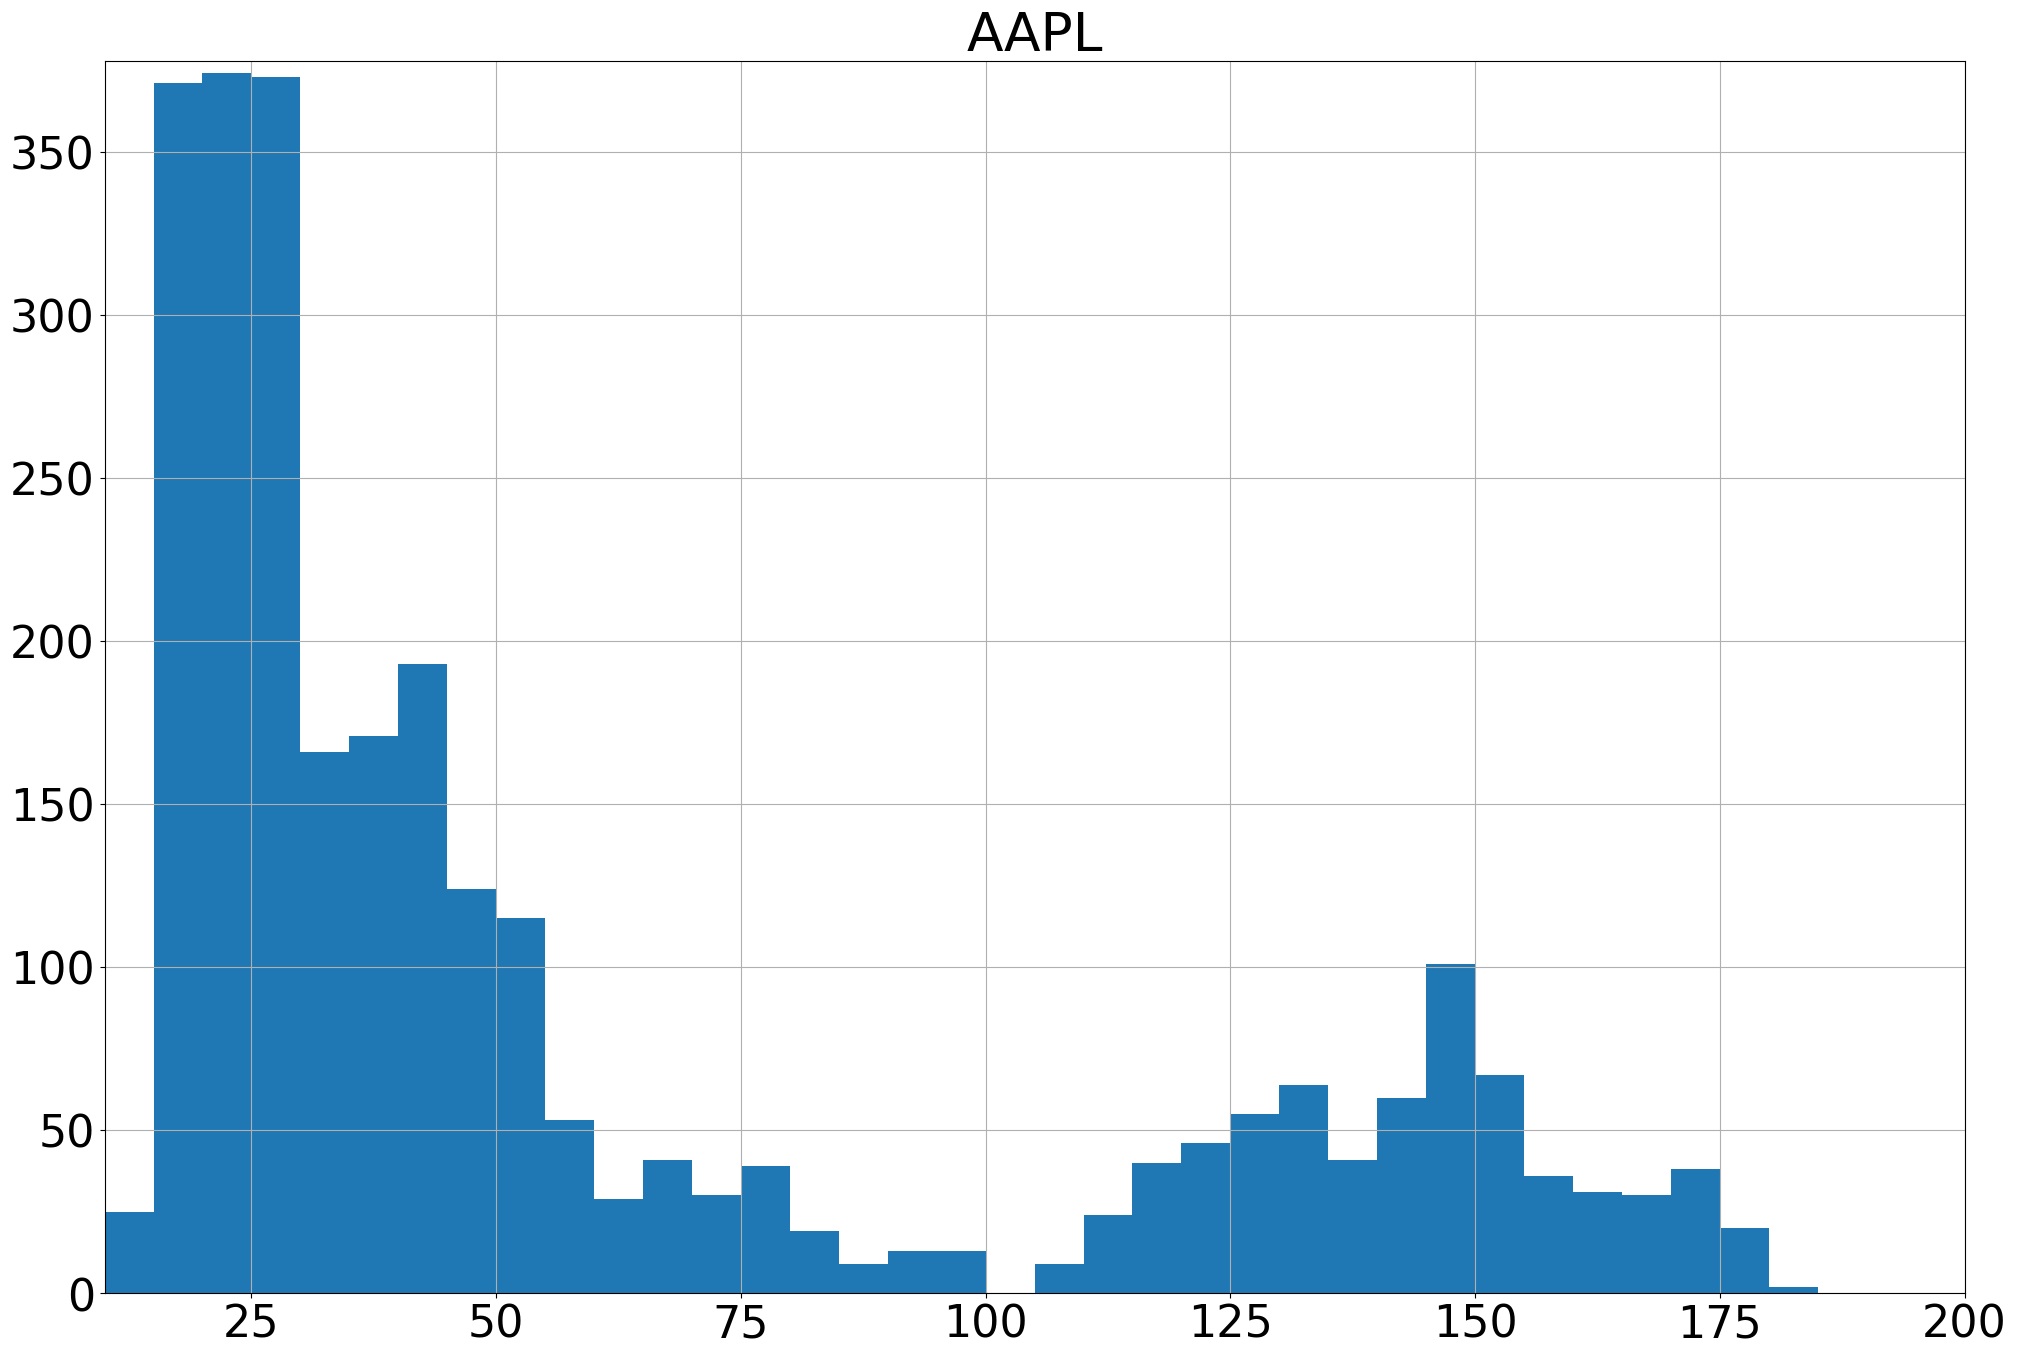

In [17]:
fig, ax = plt.subplots(figsize = (24, 16))
stock = 'AAPL'
close_data['AAPL'].hist(bins = [i for i in range(10, 201, 5)])
#close_data['AAPL'].hist(bins = 50)
ax.set_title(stock)

In [18]:
log_data = np.log(close_data)
log_data

,MSFT,AAPL,PG,TSLA
Date,,,,
2012-01-03,3.287282,2.686948,4.202152,0.627007
2012-01-04,3.310543,2.692308,4.201703,0.613743
2012-01-05,3.320710,2.703349,4.197503,0.592221
2012-01-06,3.336125,2.713748,4.195094,0.584448
2012-01-09,3.322875,2.712161,4.199305,0.597003
...,...,...,...,...
2023-03-15,5.581389,5.030373,4.954629,5.195454
2023-03-16,5.621125,5.048894,4.962075,5.215642
2023-03-17,5.632752,5.043425,4.962355,5.193679


Text(0.5, 1.0, 'AAPL')

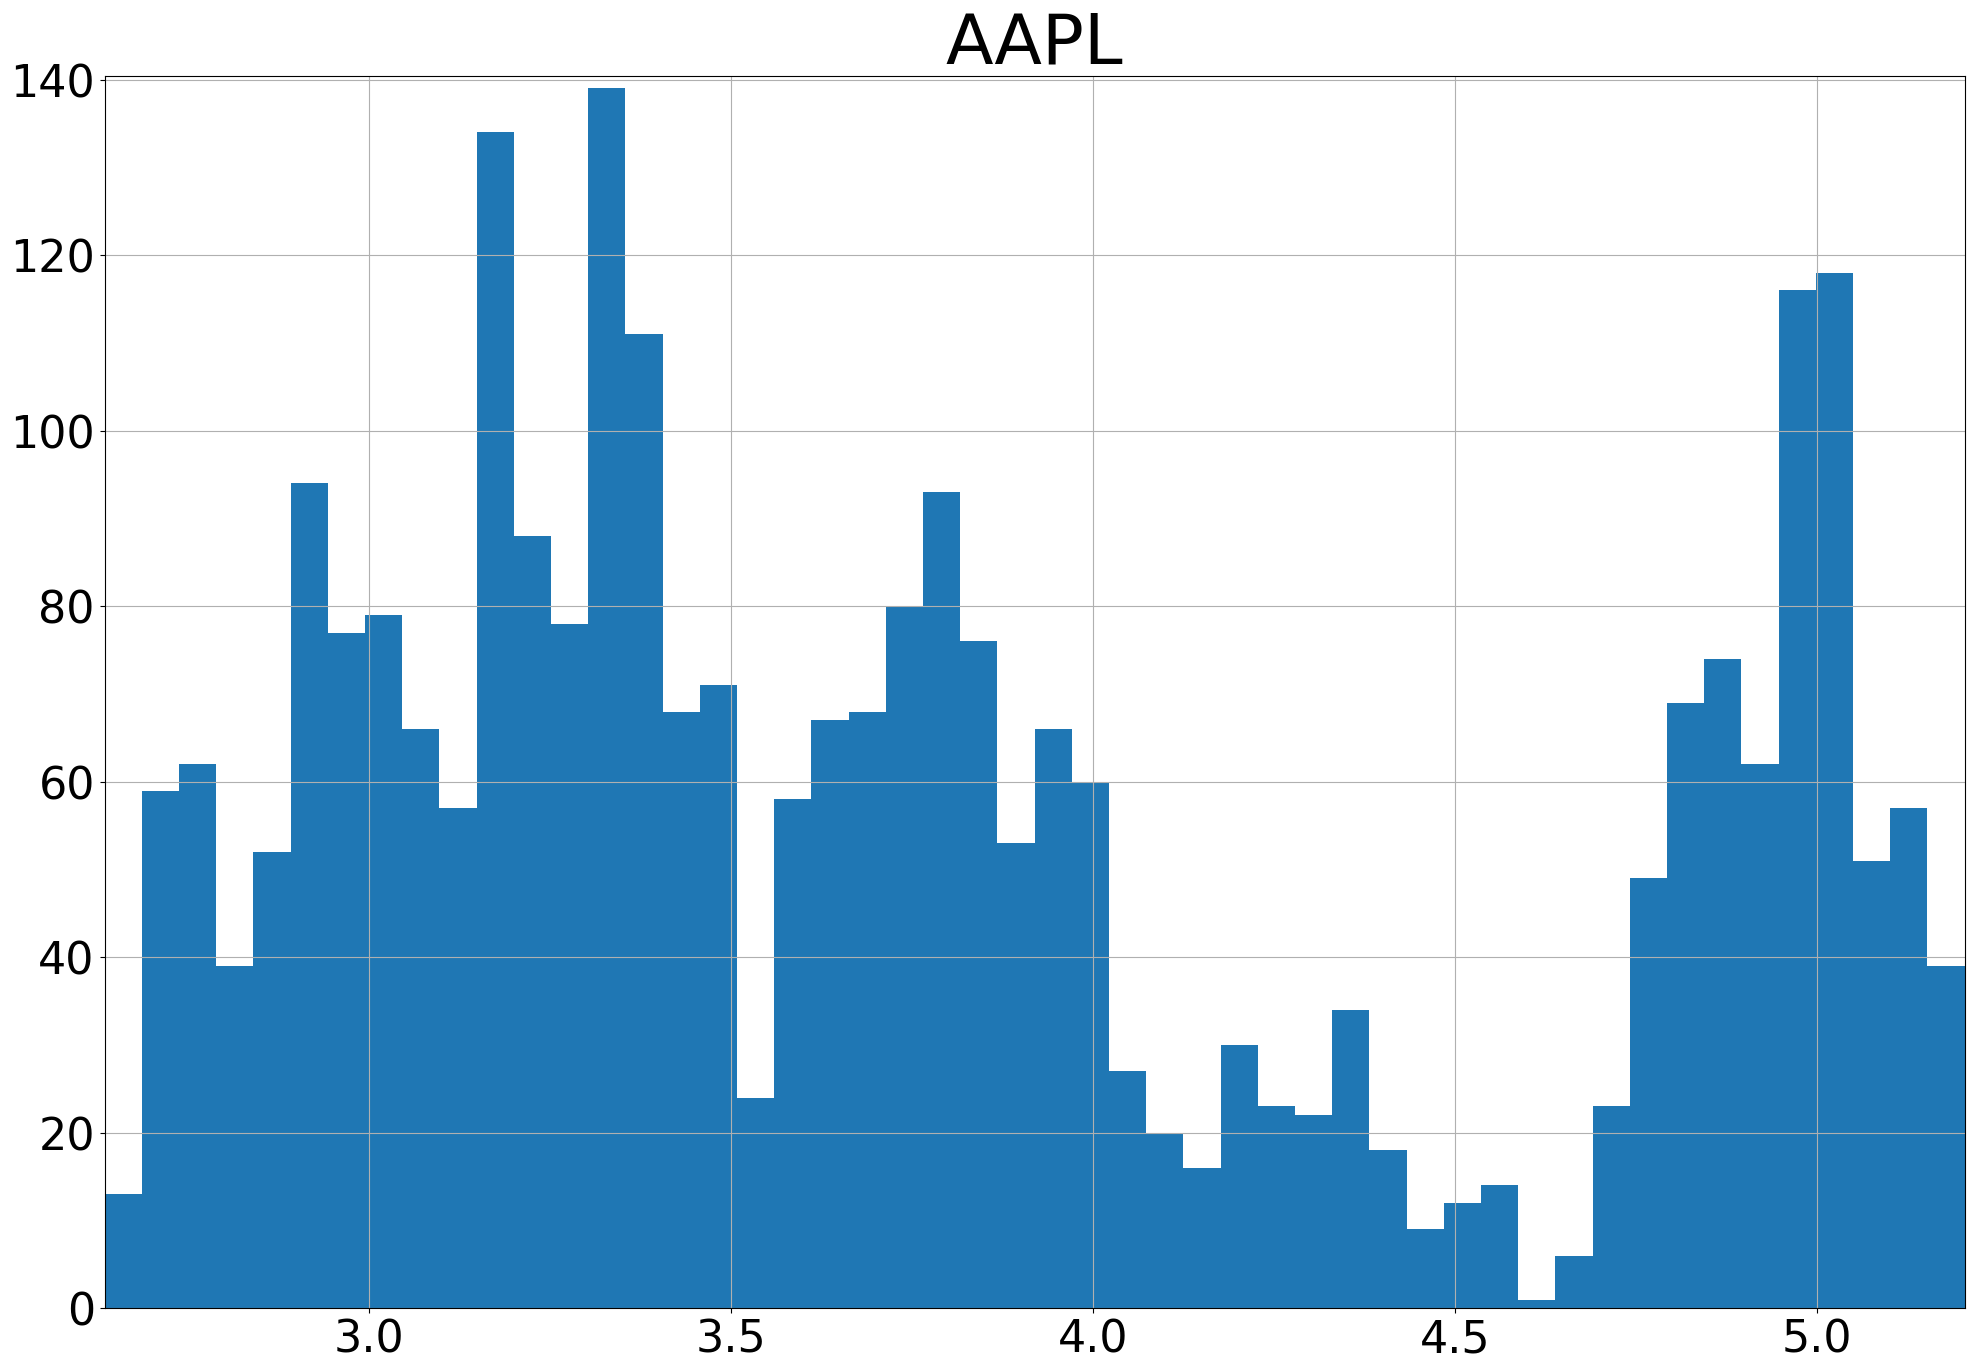

In [19]:
fig, ax = plt.subplots(figsize = (24, 16))
log_data[stock].hist(bins = 50)
ax.set_title(stock, fontsize= 50)

Let's replot the data, separating observations by year and indicating the means of each year.

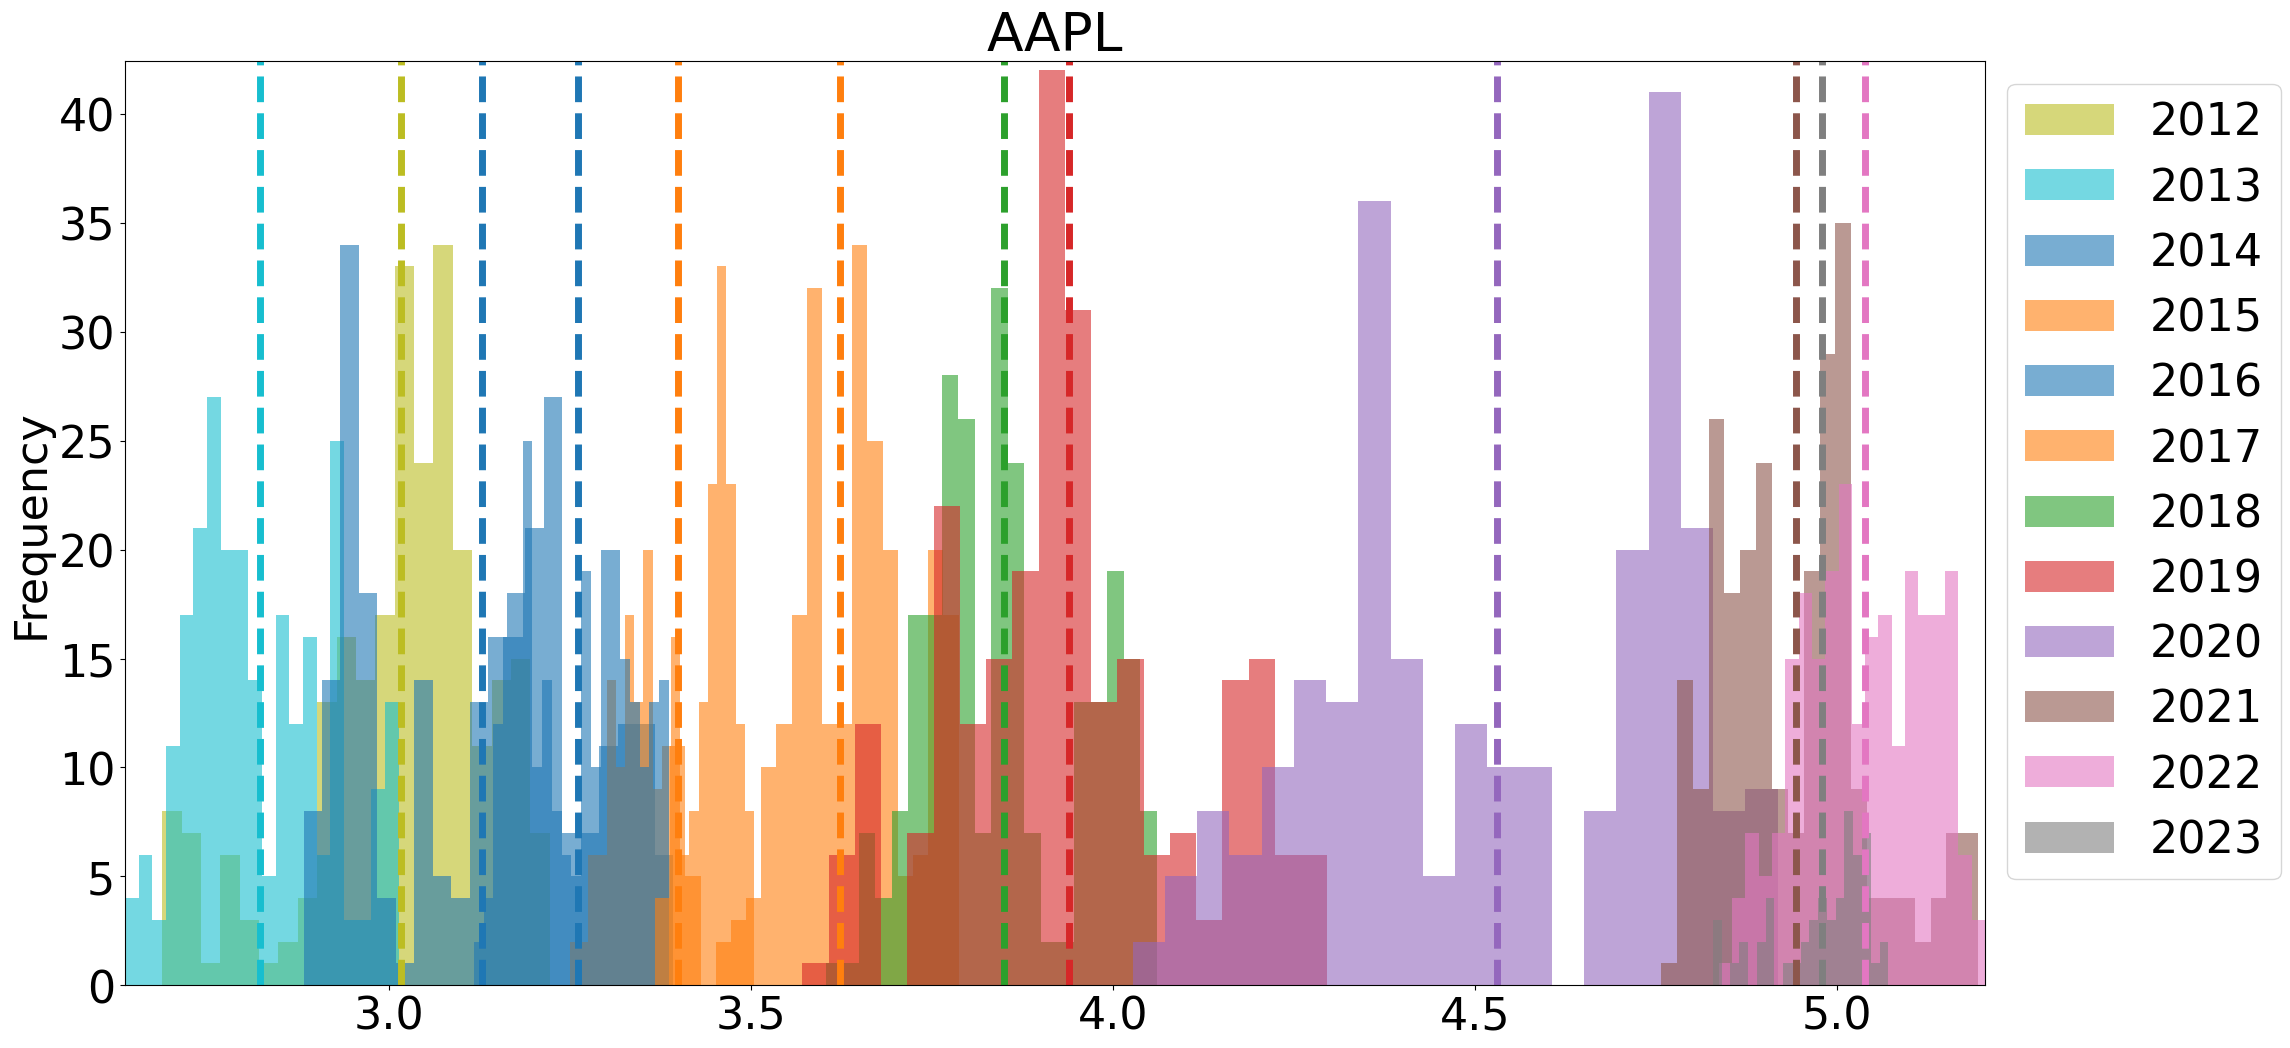

In [20]:
def graph_yearly_distribution(data, stock, figsize = (24, 12), density = False):
    years = sorted(list(set(data.index.year)))
    fig, ax = plt.subplots(figsize = figsize)
    for year in years:
        color = 'C' + str(year % 12)
        year = str(year)
        plot_data = data[stock].loc[year]
        plot_data.plot.hist(color = color,
                            alpha = .6,
                            label = year,
                            bins = 20,
                            density = density,
                            ax = ax)
        ax.axvline(plot_data.mean(),
                    color = color,
                    linewidth = 5,
                    ls = '--')
        ax.set_title(stock)
        ax.legend(bbox_to_anchor = (1, 1))


graph_yearly_distribution(log_data, stock, density = False)

In [21]:
price_chang_data = log_data.diff()
price_chang_data

,MSFT,AAPL,PG,TSLA
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.023261,0.005360,-0.000449,-0.013264
2012-01-05,0.010167,0.011041,-0.004201,-0.021522
2012-01-06,0.015415,0.010400,-0.002408,-0.007773
2012-01-09,-0.013250,-0.001587,0.004211,0.012556
...,...,...,...,...
2023-03-15,0.017673,0.002618,0.014059,-0.015452
2023-03-16,0.039736,0.018521,0.007446,0.020188
2023-03-17,0.011627,-0.005469,0.000280,-0.021963


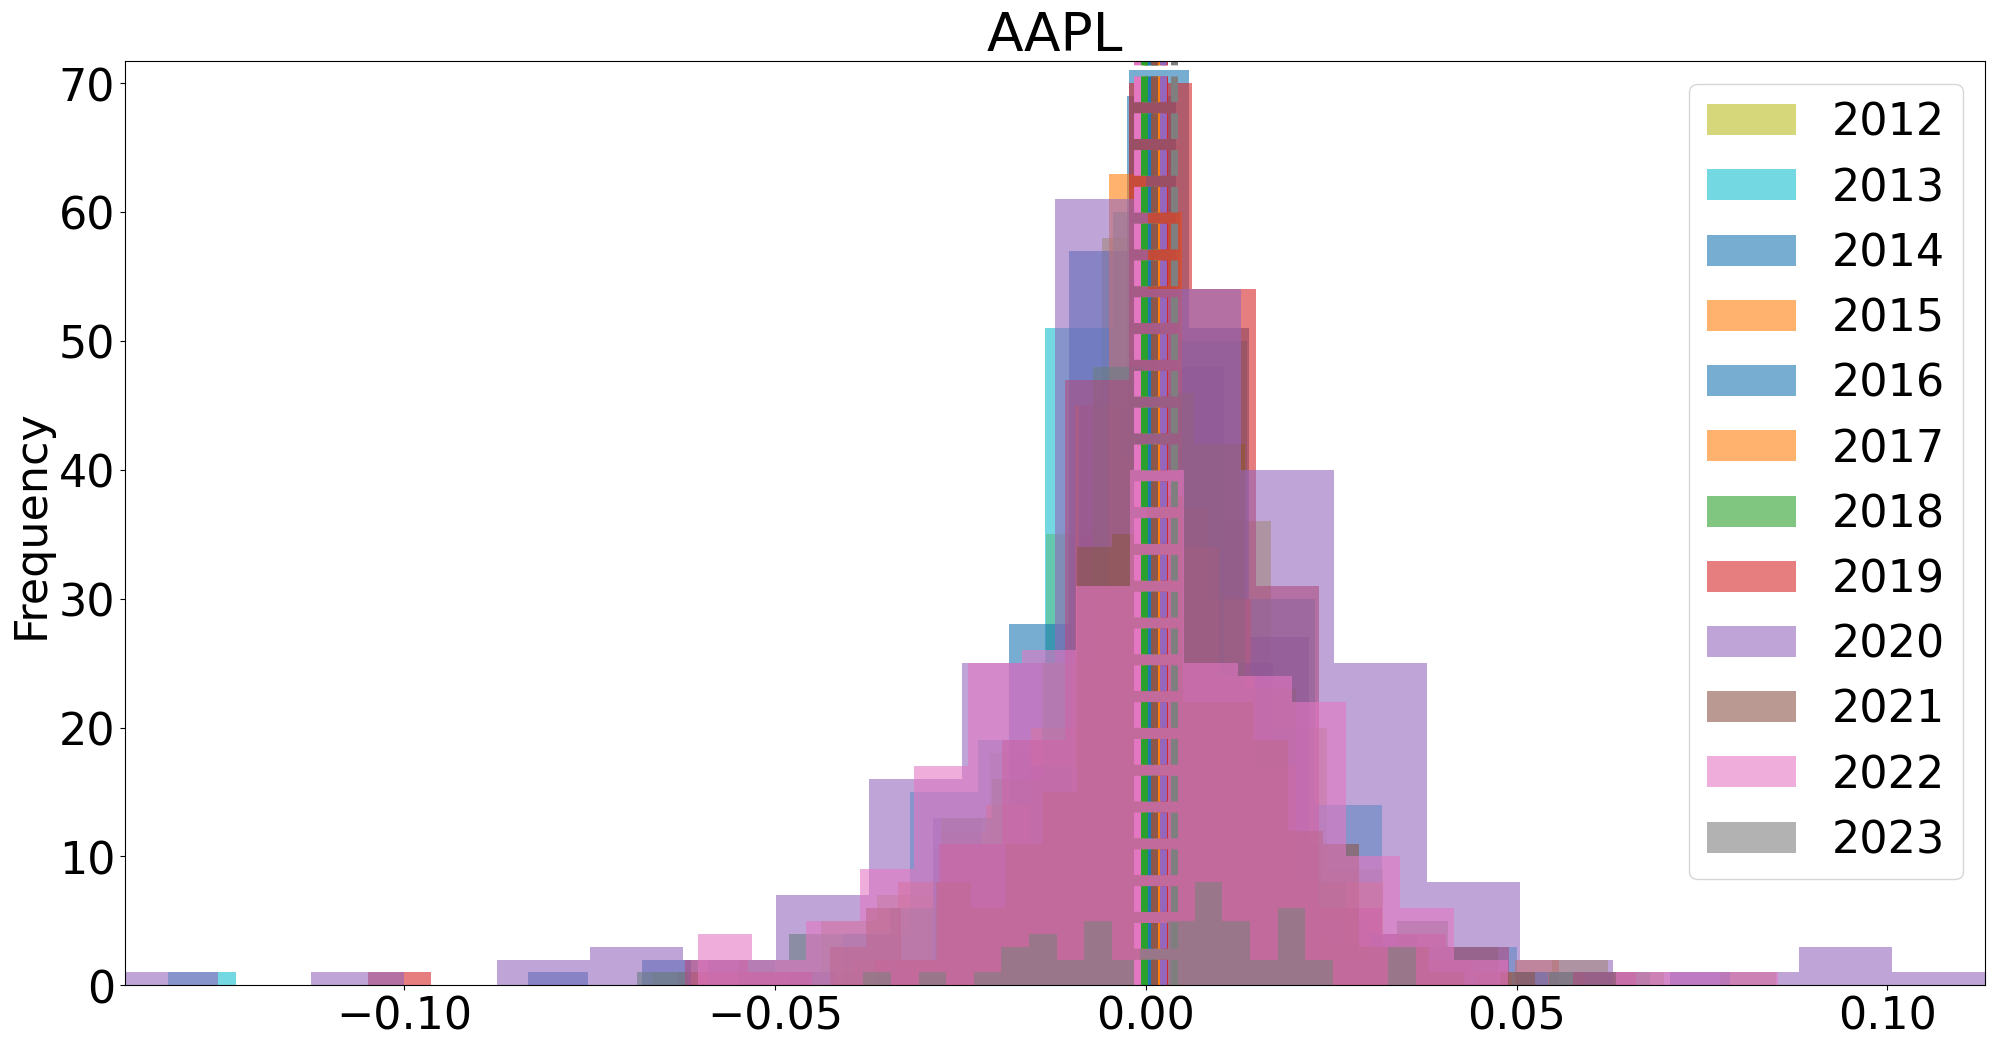

In [22]:
graph_yearly_distribution(price_chang_data, stock, density= False)

These distributions drawn from annual data do not appear at all to converge upon a normal distribution, neither do these distributions have consistent mean value. Let's transform the data so that we observe the distribution of the daily rate of change of stock prices. We will take the difference of the log values to approximate the daily rate of change of the stock price. This will make the data more closely conform to the assumption that it is identically distributed. 

If the efficient markets hypothesis is correct in any form, the distribution of daily price changes should be approximately normally distributed. We will see that, over the long-run, the hypothesis is true, but over the short-run, we may find that the tails of distributions are relatively fat, that some stocks violate this assumption, and that daily price changes are often autocorrelated. Further, the absolute value of daily price changes is also autocorrelated.